In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from segment_anything import SamPredictor, SamAutomaticMaskGenerator, sam_model_registry
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [27]:
#　画像の読み込み 
img = Image.open('/workspace/datasets/pipe2/pipes.jpg')
img = np.array(img)

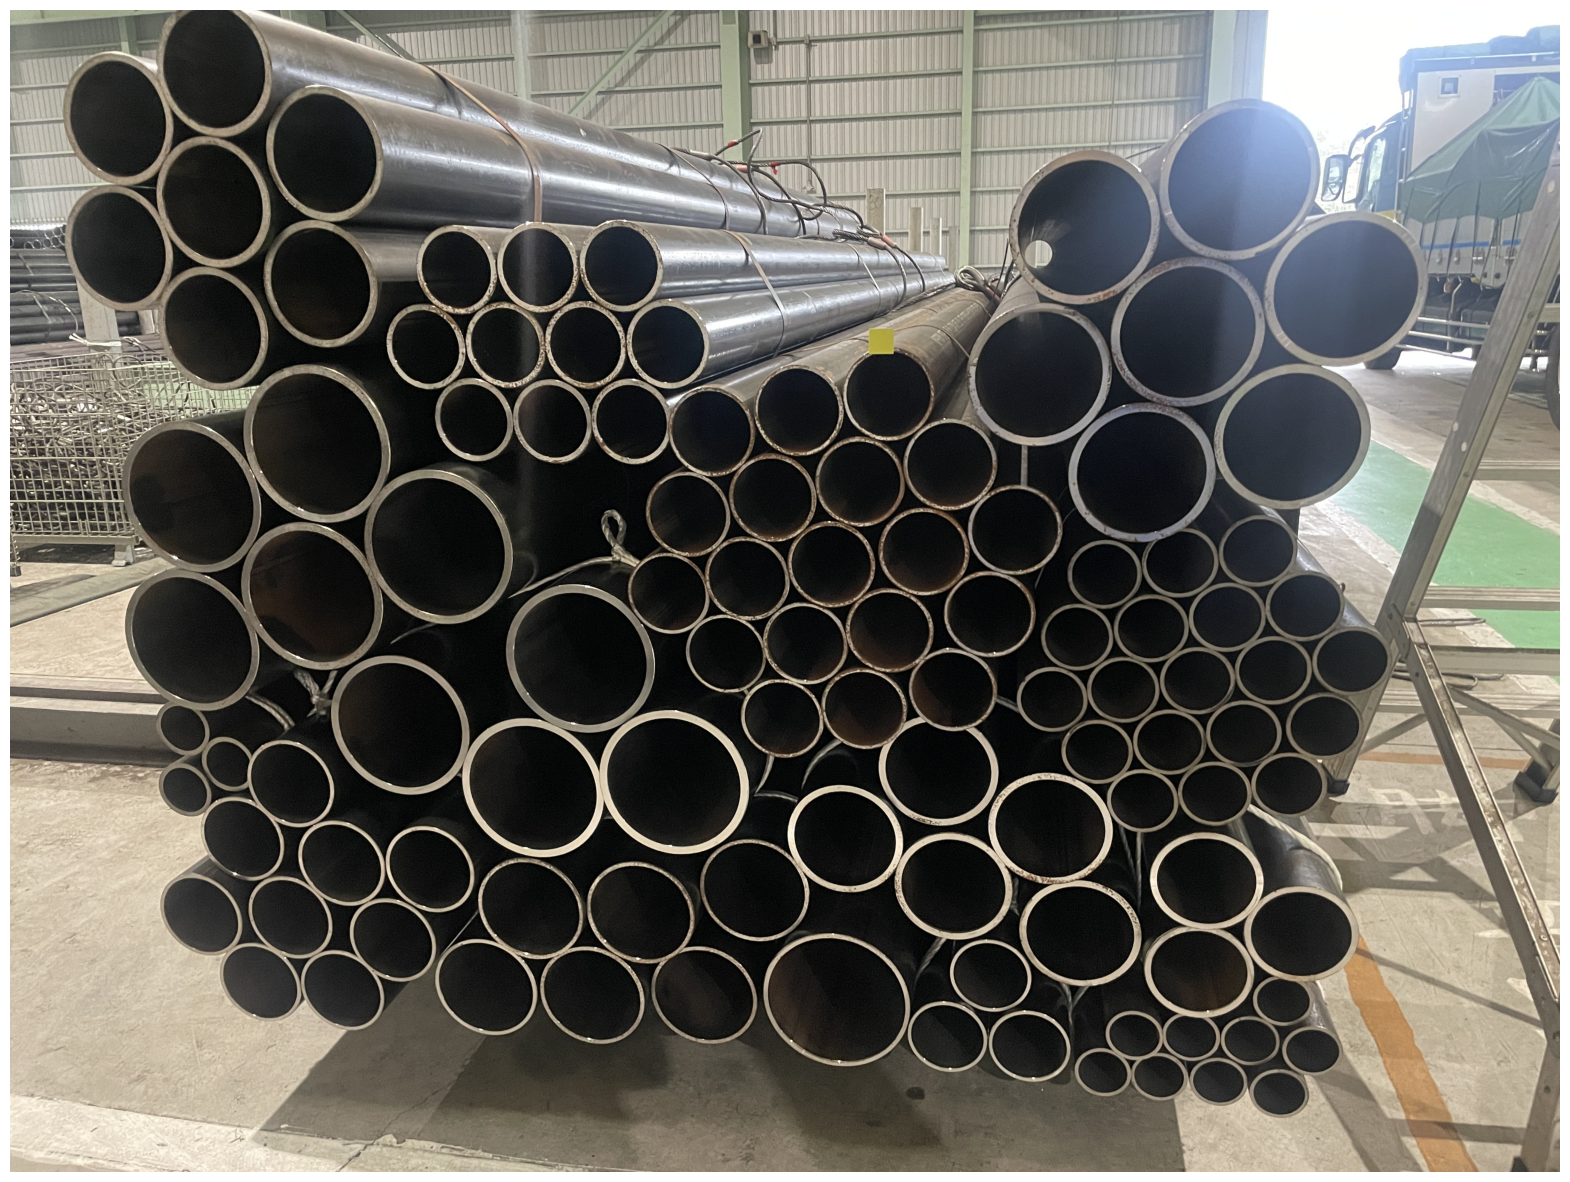

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
sam = sam_model_registry["vit_b"](checkpoint="/workspace/weights/sam/sam_vit_b_01ec64.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img)

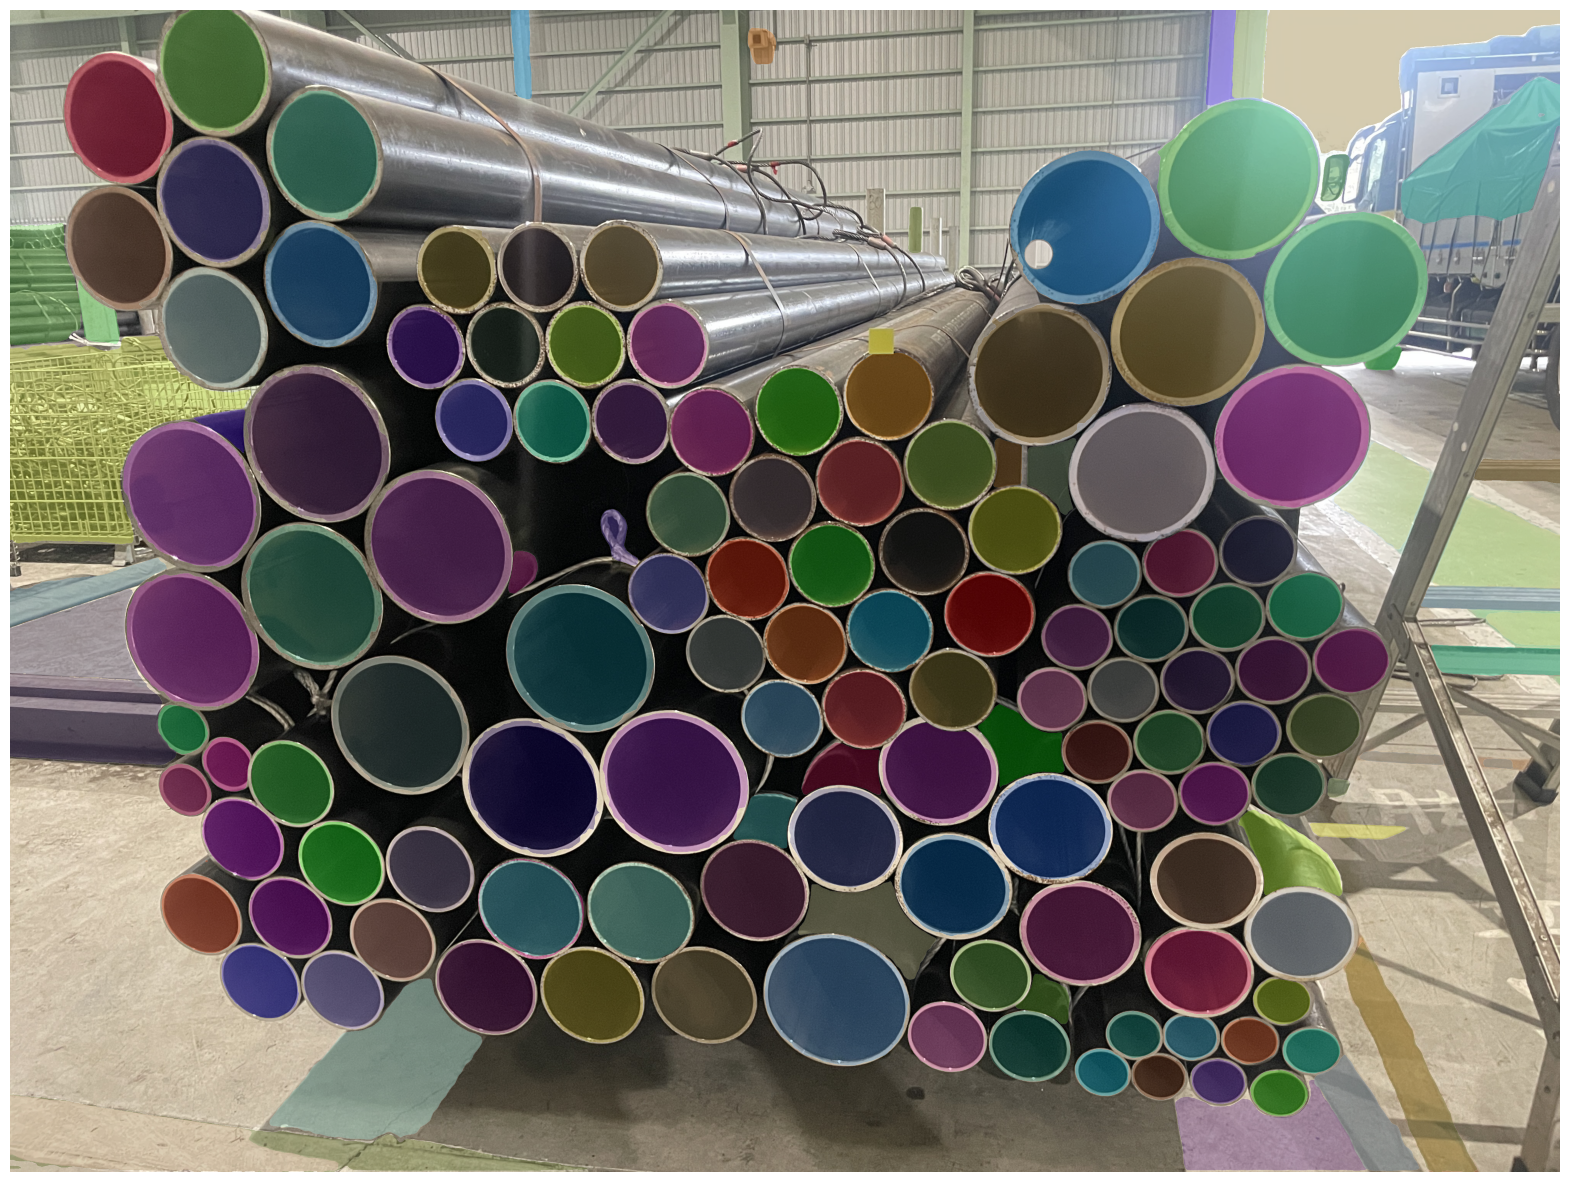

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 

In [22]:
#　画像の読み込み 
img = Image.open('/workspace/datasets/pipe2/l_pipe.jpg')
img = np.array(img)

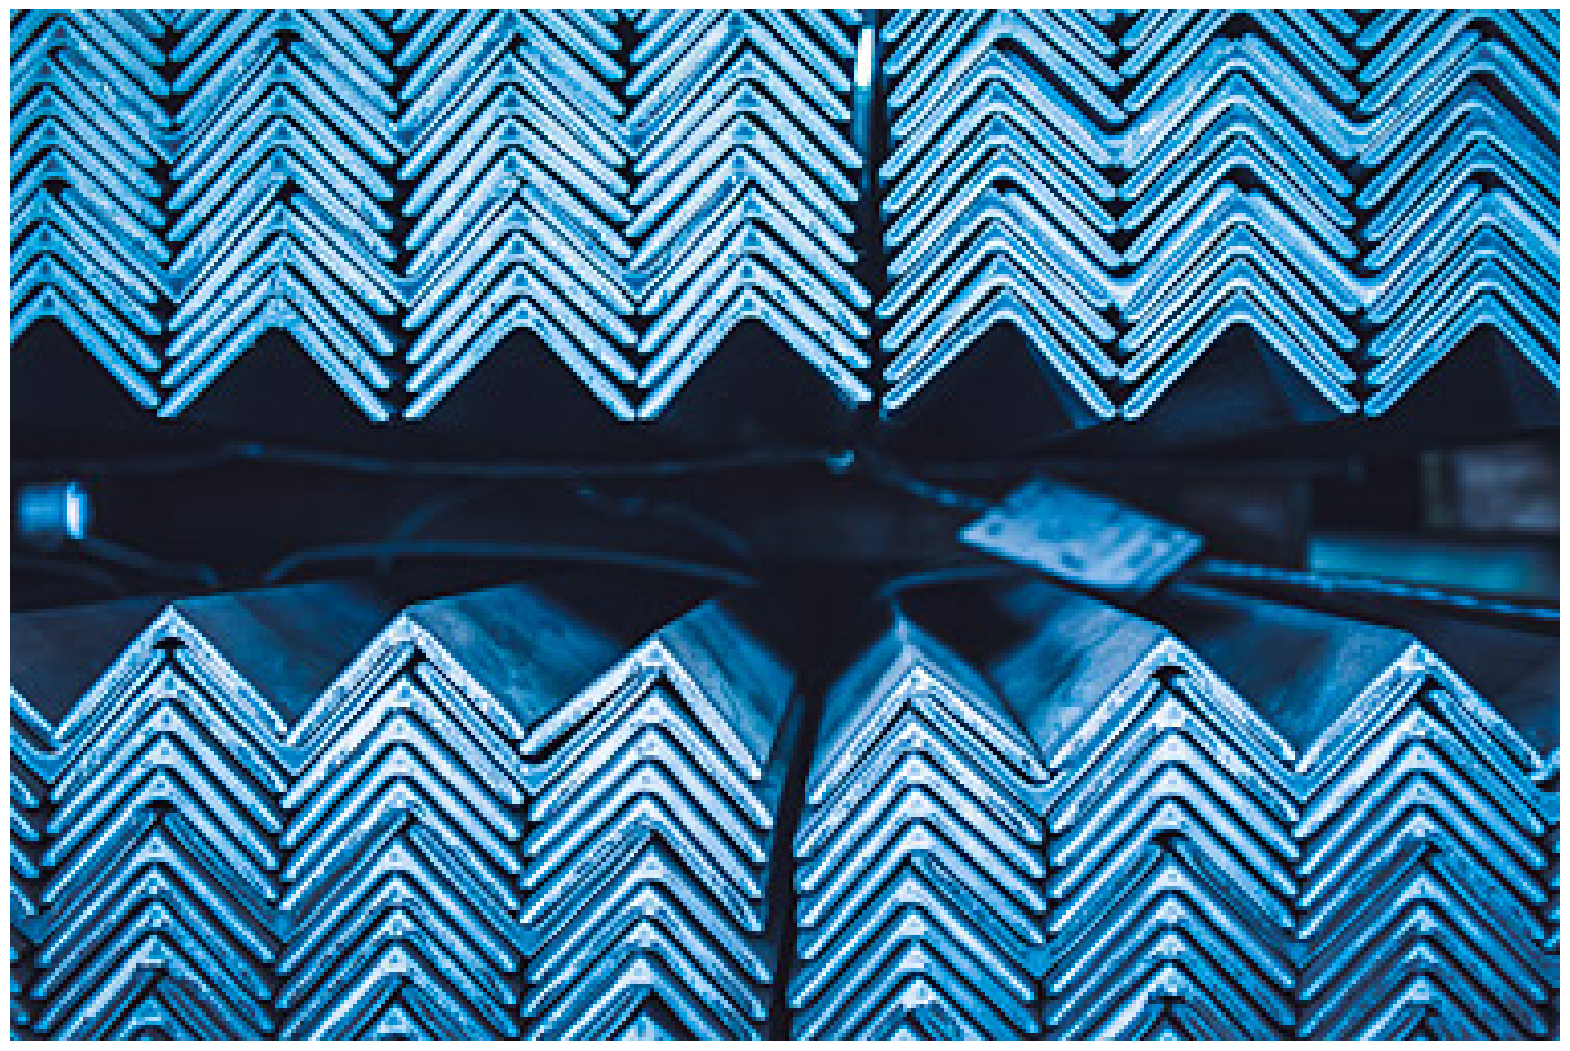

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
sam = sam_model_registry["vit_b"](checkpoint="/workspace/weights/sam/sam_vit_b_01ec64.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img)

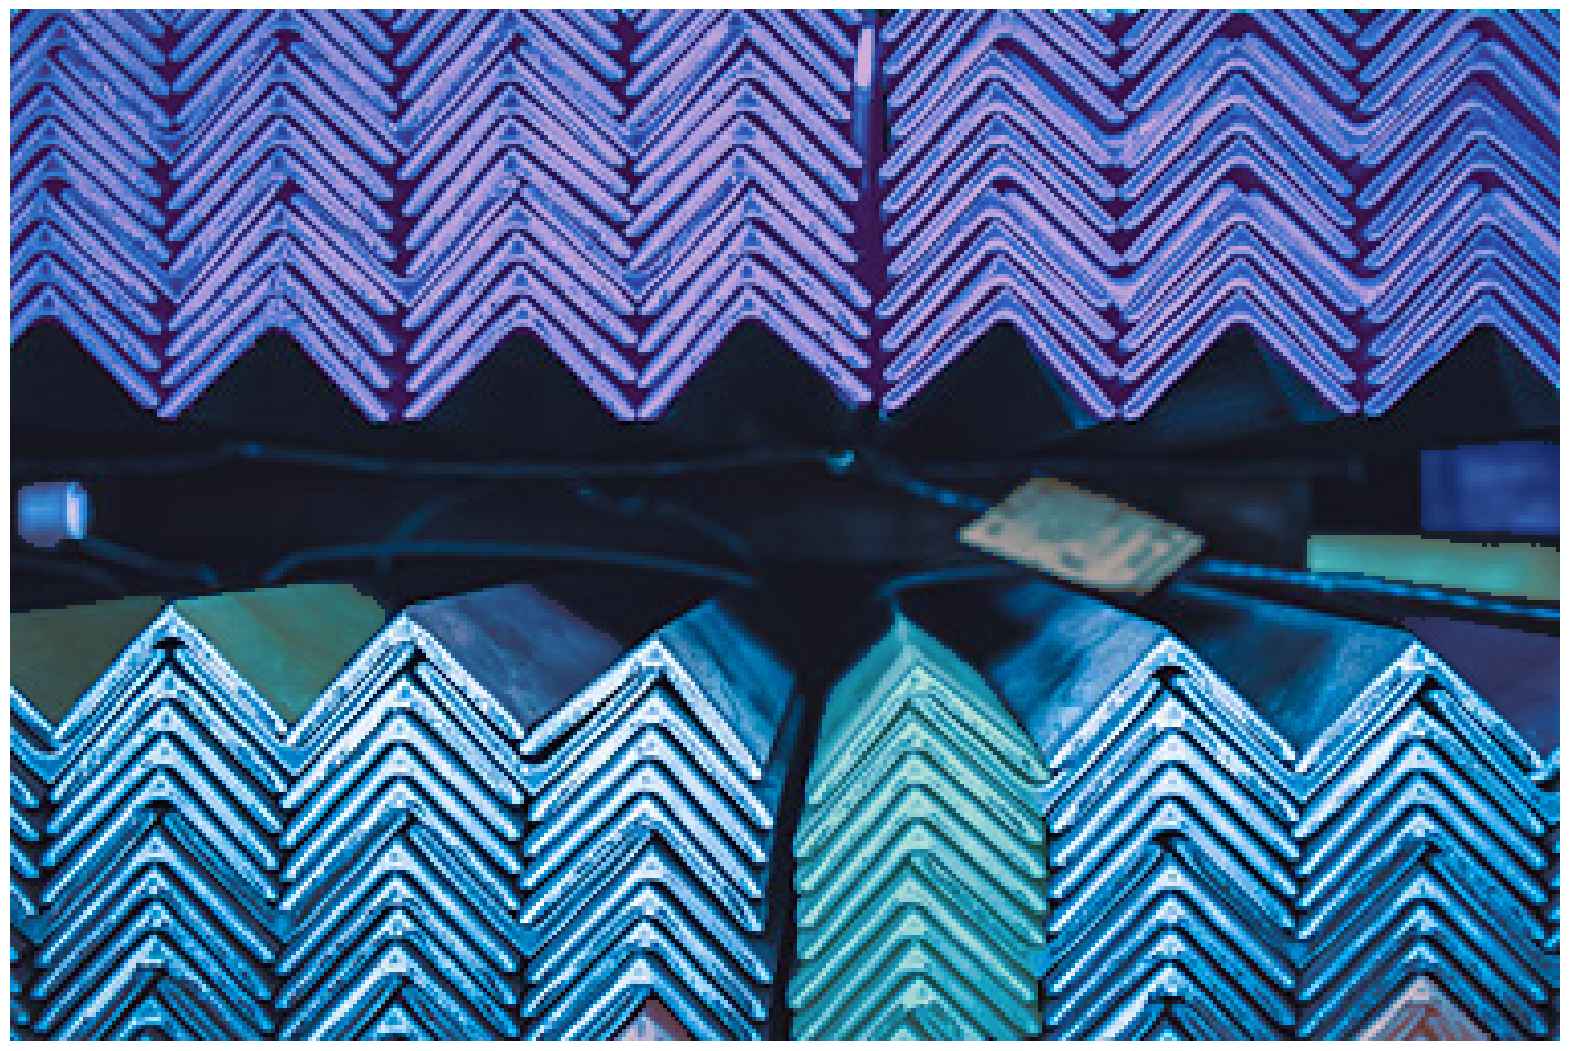

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 